### Goal

In this notebook, we explore calculating the CC and normalized CC on synthetic response data.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from brainbox import neural

%load_ext autoreload
%autoreload 2

In [2]:
def nicify(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylabel("Signal (a.u.)", fontsize=14, labelpad=2)
    ax.set_xlabel("Time (s)", fontsize=14, labelpad=2)

def generate_synth_target_response(repeats, t_len):
    torch.manual_seed(10)
    out = torch.sin(torch.linspace(0, 2*np.pi, t_len).view(1, -1)) * (1 + torch.rand(repeats).view(-1, 1))
    out += 0.5*torch.rand_like(out)
    return out
    
def generate_predicted_response(t_len):
    torch.manual_seed(2)
    pred = torch.sin(torch.linspace(0, 2*np.pi, t_len).view(1, -1))
    pred = pred*torch.rand_like(pred)*2
    return pred
    
target_responses = generate_synth_target_response(5, 100)
mean_target_response = target_responses.mean(0).unsqueeze(0)
predicted_response = generate_predicted_response(100)

target_responses.shape, mean_target_response.shape, predicted_response.shape

(torch.Size([5, 100]), torch.Size([1, 100]), torch.Size([1, 100]))

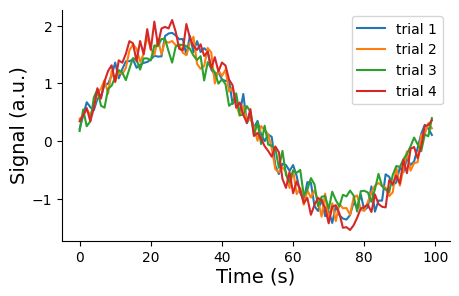

In [3]:
# Our synthetic response data looks as follows
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(target_responses[0], label="trial 1")
ax.plot(target_responses[1], label="trial 2")
ax.plot(target_responses[2], label="trial 3")
ax.plot(target_responses[3], label="trial 4")
ax.legend()
nicify(ax)

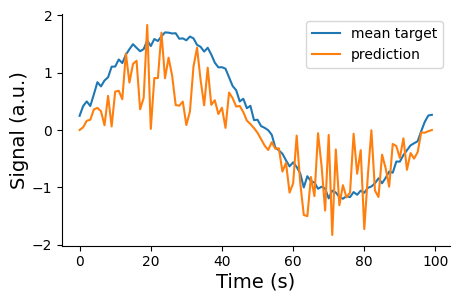

In [4]:
# Our generated synthetic prediction compared to the synthetic mean response
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(mean_target_response[0], label="mean target")
ax.plot(predicted_response[0], label="prediction")
ax.legend()
nicify(ax)

In [5]:
cc_value = neural.cc(mean_target_response, predicted_response)  # takes input shape: units x time
cc_max = neural.compute_max_cc(target_responses.permute(1, 0))  # takes input shape: time x repeats (for single unit)

cc_norm = cc_value/cc_max
print(f"cc = {cc_value.item():.2f}")
print(f"cc_max = {cc_max.item():.2f}")
print(f"cc_norm = {cc_norm.item():.2f}")

cc = 0.86
cc_max = 0.91
cc_norm = 0.95
